# `The humble MNIST classification problem!`
### This hopefully will be a simple way to illustrate how a neural network works. There will be a few assumptions made before we dive into the explanations (for example, familiarity with how an image is represented as a numpy array, etc). The key is to not give up!

### The MNIST is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images and our job is to make our model (Neural network) to correctly identity which category each image from the dataset belongs to.


## `The following are the steps involved in solving simple problems using Neural networks:`
1. Download/Import DataSet 
2. Split/Load data into `TrainSet` and `TestSet`
3. Prepare the data in such a way that its compatible to be fed to our Neural Network (NN)
4. Contrusct/Architect a NN
5. Compile the NN by using 3 things: `Optimizer` | `Loss` | `Metrics of evaluation`
6. Train/Fit the NN to our DataSet





In [1]:
from keras import utils
utils.set_random_seed(15)


from keras.datasets import mnist                              # Importing the dataset of MNIST from keras
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
                                                              # Here, we use the load_data() function to give us 4 sets of data
                                                              # Train images, Train labels are the first 2 sets that are grouped together into a tuple
                                                              # Test images and Test labels are the 2 other categories that the load.data() returns
                                                              # The shape of the Train images and Test images will be (60000,28,28)
                                                              # The shape of the Train and Test labels will be (60000,) since its a scalar

# Uncomment the following code to view the shape of each of the sets we discussed above.

print(f"The shape of Train Images is: {train_images.shape}")
# print(f"The shape of Train Labels is: {train_labels.shape}")
# print(f"The shape of Test Images is: {test_images.shape}")
# print(f"The shape of Test Labels is: {test_labels.shape}")


11490434/11490434 [==============================] - 0s 0us/step
The shape of Train Images is: (60000, 28, 28)


Lets Visualise how the images in this DataSet look!
For visualization and plotting, we will use the matplotlib library.

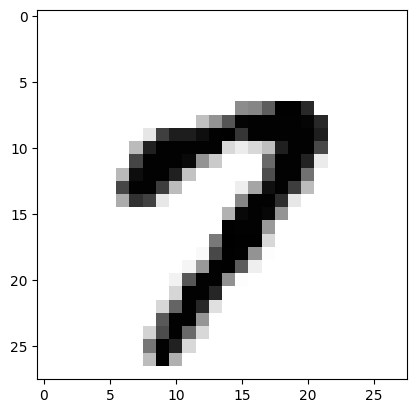

In [2]:
import matplotlib.pyplot as plt                               # Importing the matplotlib library for visualization

digit_image = train_images[15]                                # Choosing the 15th image from our train DataSet to visualize

plt.imshow(digit_image, cmap = "binary")                      # imshow() method creates a figure of our image using matplotlib, 
                                                              # and binary is to show in black and white
plt.show()                                                    # plt.show() displays the created image.

We are done with the first 2 steps to solve this problem, which are as follows:
1. Download/Import DataSet ✔
2. Split/Load data into `TrainSet` and `TestSet` ✔

Now moving on to the next step



### `Preprocessing the Data!`
1. The original shape of the data is (60000, 28, 28), and we change it to (60000, 28*28)
2. The original type is uint8, and we change it to float32 for the division part in next step
3. We reduce the values of the pixels in the images from the range of (0 to 255) to (0 to 1)

In [3]:
train_images = train_images.reshape((60000, 28*28)).astype('float32')
                                                              # We change the shape to (60000, 28*28) as expected by our model(NN) and as float32
test_images = test_images.reshape((10000, 28*28)).astype('float32')
                                                              # We change the shape to (10000, 28*28) as expected by our model(NN) and as float32

train_images = train_images/255                               # We reduce the range of pixel values from (0-255) to (0-1)
test_images = test_images/255                                 # We reduce the range of pixel values from (0-255) to (0-1)


from keras.utils import to_categorical                        # We import the to_categorical that converts integers to binary class matrix.

train_labels = to_categorical(train_labels)                   # Converting the integers to a binar class matrix
test_labels = to_categorical(test_labels)                     # Converting the integers to a binar class matrix


In [4]:
from keras.layers.serialization import activation
from IPython.utils.io import unicode_std_stream
from keras import models                                      # Importing models from keras
from keras import layers                                      # There are two types of models that keras offers: Sequential API and Functional API
                                                              # We will use the sequential one!
our_neural_network = models.Sequential(                       # Creating our neural network with a sequential model
    [layers.Dense(units= 512, activation= "relu", input_shape= (28*28,)),
                                                              # Units are the number of neurons in that layer
                                                              # activation function is used to induce non-linearity in the network, We use ReLu.
                                                              # Input_Shape is the shape of the data we will feed the network and it has to be mentioned.
     layers.Dense(units= 256, activation= "relu"),
     layers.Dense(units= 124, activation= "relu"),
     layers.Dense(units= 64, activation= "relu"),
     layers.Dense(units = 10, activation= "softmax")          # The last layer will have 10 neurons as we have 10 categories to classify
                                                              # The activation function now will be softmax, as it returns the probability of which 
                                                              # category a particular digit belongs to
     
    ]
)

#Now comes the compilation part!

our_neural_network.compile(                                   # We use the compile method to configure our model for training
    optimizer= "adam",                                        # Optimizer is a mechanism by which the model will update itself to become better 
    loss = "categorical_crossentropy",                        # loss is the loss function is the mechanism used to steer the model in the right 
                                                              # direction to better itself!
    metrics= ['accuracy']                                     # A means to judge the performance of the model (example: accuracy)
)

We are done with the first 5 steps to solve this problem, which are as follows:
1. Download/Import DataSet ✔
2. Split/Load data into `TrainSet` and `TestSet` ✔
3. Prepare the data in such a way that its compatible to be fed to our Neural Network (NN) ✔
4. Contrusct/Architect a NN ✔
5. Compile the NN by using 3 things: `Optimizer` | `Loss` | `Metrics of evaluation` ✔

Now its time for us to train/fit our very first neural network! We use the `fit` method to do so.

In [5]:
our_neural_network.fit(train_images, train_labels, batch_size= 82, epochs= 12)
                                                              # Now lets train our NN for 10 epochs and see what happens! 
                                                              # The fit method needs our train images and train labels, epochs needed and batch size!


Epoch 1/12
732/732 [==============================] - 9s 9ms/step - loss: 0.2259 - accuracy: 0.9313
Epoch 2/12
732/732 [==============================] - 6s 8ms/step - loss: 0.0869 - accuracy: 0.9739
Epoch 3/12
732/732 [==============================] - 7s 9ms/step - loss: 0.0615 - accuracy: 0.9806
Epoch 4/12
732/732 [==============================] - 8s 11ms/step - loss: 0.0459 - accuracy: 0.9859
Epoch 5/12
732/732 [==============================] - 8s 11ms/step - loss: 0.0377 - accuracy: 0.9875
Epoch 6/12
732/732 [==============================] - 6s 8ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 7/12
732/732 [==============================] - 6s 9ms/step - loss: 0.0265 - accuracy: 0.9915
Epoch 8/12
732/732 [==============================] - 6s 8ms/step - loss: 0.0234 - accuracy: 0.9926
Epoch 9/12
732/732 [==============================] - 7s 10ms/step - loss: 0.0206 - accuracy: 0.9936
Epoch 10/12
732/732 [==============================] - 6s 8ms/step - loss: 0.0194 - accuracy: 0.9

1. Now there was something purposeful in choosing the number of epochs as 12!
As you will see, The model achieves an accuracy above 98% in the first few epoch itself(the accuracy will vary with every instance of training, so dont worry if you are getting a different result than mine). After which the accuracy only increases marginally or even fluctuates around a certain percentage. This is an excellent symptom of overfitting! 

2. `Overfitting`, to put in layman's term, is a condition where your model has learned the representation of your dataset so well, that it does not perform well when it is given any other new data. `It is a condition to be avoided` and there are certain techniques to do so.

3. Here, we can use, perhaps the simplest technique when you see overfitting, which is to `simplify your model`, or reduce the complexity of our model. Or, we can `reduce the number of epochs!` 

4. The neural network that we built maybe has too many layers and is too complex for the humble dataset of MNIST. Try reducing the dense layers in the NN and see what happens. Also, you can try to reduce the number of epochs! I wont explain what method out of these two you must use, rather try it yourself!

5. Now we will move on to testing whether our model is any good. This can be done by making the model predict using the **Test DataSet**

In [8]:
test_loss, test_accuracy = our_neural_network.evaluate(test_images, test_labels)
                                                                # The evaluate method to check the performance of our model on test/new data
                                                                # which returns us 2 values: loss and accuracy!
print(f"The performance of our model on the test data is as follows : \nTest loss: {test_loss}\nTest accuracy:{test_accuracy}")
                                                                

313/313 [==============================] - 1s 2ms/step - loss: 0.0790 - accuracy: 0.9821
The performance of our model on the test data is as follows : 
Test loss: 0.07897141575813293
Test accuracy:0.9821000099182129


Well, my training accuracy was 99.48% and I got a test accuracy of 98.21%, which isn't too bad, but not great either. So do try the methods to avoid overfitting and see the gap between the training accuracy and the test accuracy diminish!

Hope this was a simple tutorial for those who want to directly dive into the empirical journey of NNs and not heavy on theory. 

***Phir milenge!*** ✨